In [1]:
#The following code snippet is used to upload a file from the local drive to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv
User uploaded file "xAPI-Edu-Data.csv" with length 38026 bytes


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px


In [4]:
fname = "xAPI-Edu-Data.csv"
df = pd.read_csv(fname)

In [5]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
print(df.columns)    

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [8]:
df.isnull().sum().sum() # Null Value Check

0

In [12]:
#3D view based of students based on class, Nationality, grade and colour is gender
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(df, x='NationalITy', y='Class', z='GradeID', color='gender')
fig.show()

<Figure size 720x216 with 0 Axes>

## Visualization

# Target - Distribution

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

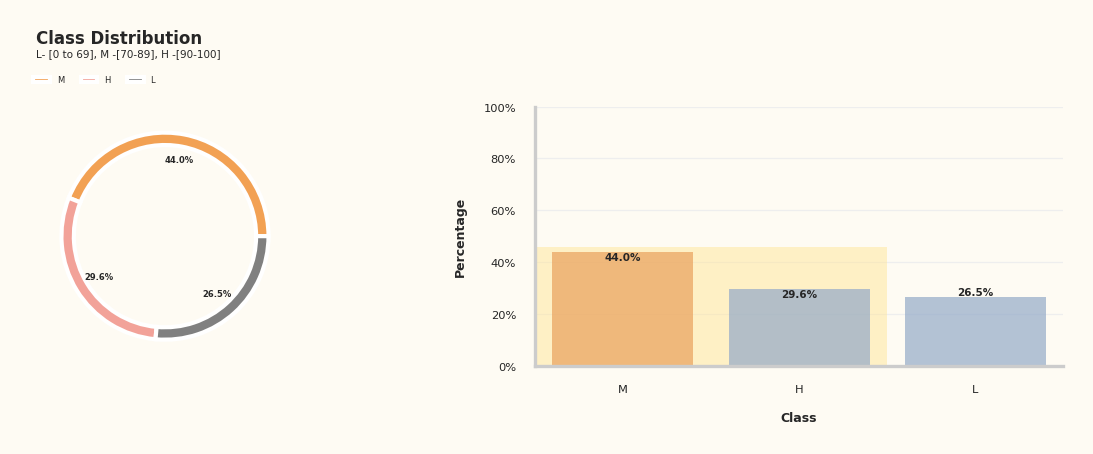

In [13]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 4), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)
#Pie
temp = pd.DataFrame(df.groupby('Class', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp.loc[(temp.answer=='M') | (temp.answer=='H') | (temp.answer=='L')]
temp = temp.groupby('answer').sum().reset_index()
temp = temp.sort_values('amount', ascending=False)
color_map = ['#F2A154', '#F2A299', 'gray']
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#FEFBF3")

#graph
ax0.pie(x=temp['amount'], wedgeprops=dict(width=0.12), colors=color_map, pctdistance=0.75,
        textprops={'fontsize': 2, 'weight': 'semibold'}, autopct='%1.1f%%')

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*1.60, 'Class Distribution', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1*1.45, 'L- [0 to 69], M -[70-89], H -[90-100]', fontsize=2.5, ha='left', va='top')
ax0.legend(temp['answer'], loc="upper left", bbox_to_anchor=(x0*0.03, y1*0.92), prop={'size': 2}, frameon=False, ncol=3)

#format tick
ax0.tick_params(labelsize=3, width=0.5, length=1.5)

#Bar
temp = pd.DataFrame(df.groupby('Class', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('pct', ascending=False)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 1])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 5))
ax0.set(ylim=(0, 100))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['answer'], zorder=2, linewidth=0, saturation=.9, alpha=0.7)
fillwidth = np.array([-0.5,1.5])
ax0.fill_between(fillwidth, np.max(temp['pct']+2), color='#FFE699', alpha=0.5, zorder=2, linewidth=0)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.75, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()


# Gender Distribution

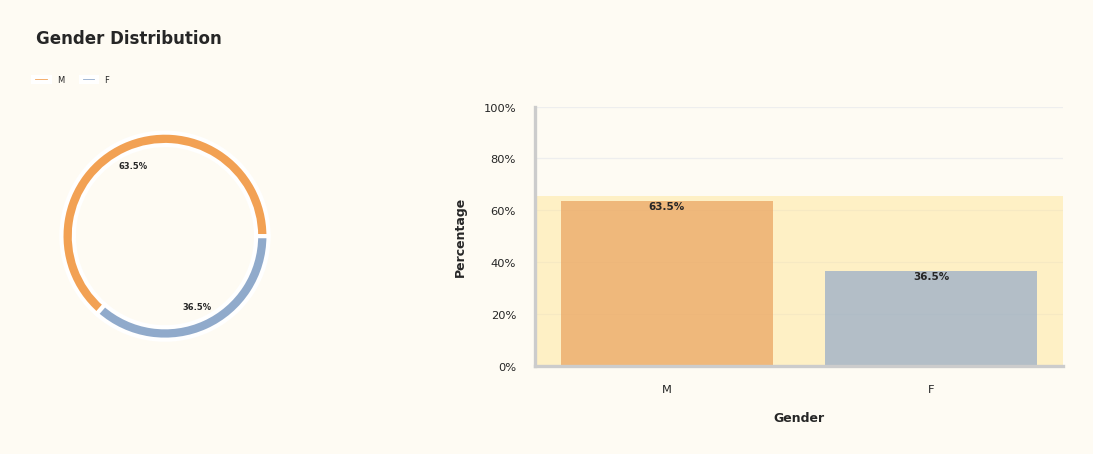

In [14]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 4), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)

#Pie
temp = pd.DataFrame(df.groupby('gender', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp.loc[(temp.answer=='M') | (temp.answer=='F') ]
temp = temp.groupby('answer').sum().reset_index()
temp = temp.sort_values('amount', ascending=False)
color_map = ['#F2A154', '#90AACB']
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor("#FEFBF3")

#graph
ax0.pie(x=temp['amount'], wedgeprops=dict(width=0.12), colors=color_map, pctdistance=0.75,
        textprops={'fontsize': 2, 'weight': 'semibold'}, autopct='%1.1f%%')

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*1.60, 'Gender Distribution', fontsize=4, ha='left', va='top', weight='bold')
ax0.legend(temp['answer'], loc="upper left", bbox_to_anchor=(x0*0.03, y1*0.92), prop={'size': 2}, frameon=False, ncol=3)

#format tick
ax0.tick_params(labelsize=3, width=0.5, length=1.5)

#Bar
temp = pd.DataFrame(df.groupby('gender', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
#temp = temp.drop(4)
temp = temp.sort_values('pct', ascending=False)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 1])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 5))
ax0.set(ylim=(0, 100))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['answer'], zorder=2, linewidth=0, saturation=.9, alpha=0.7)
fillwidth = np.array([-0.5,1.5])
ax0.fill_between(fillwidth, np.max(temp['pct']+2), color='#FFE699', alpha=0.5, zorder=2, linewidth=0)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

#format axis
ax0.set_xlabel("Gender",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.75, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

## Class wrt Gender

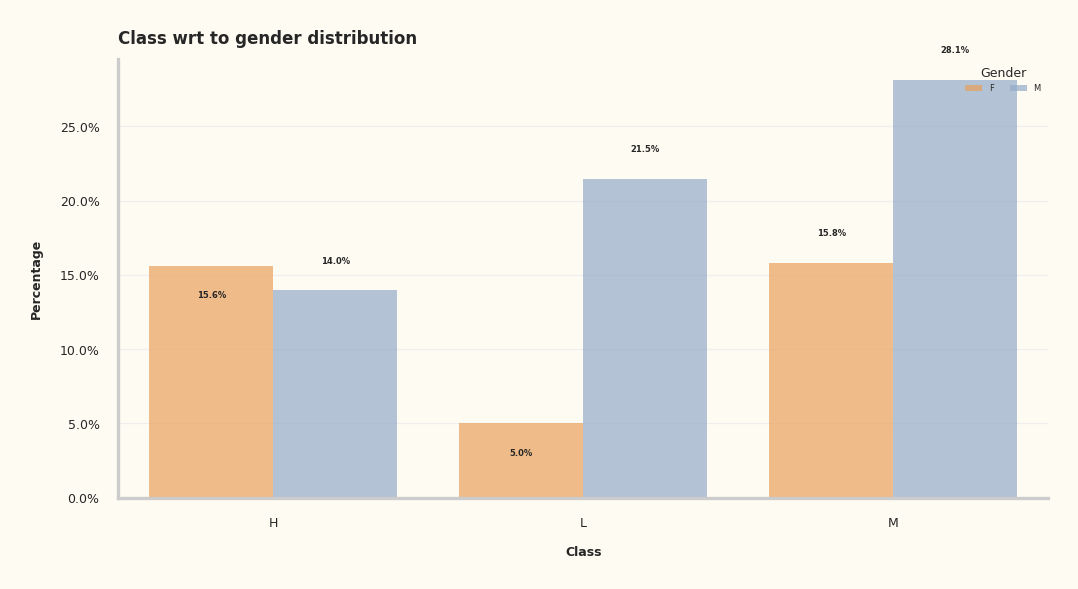

In [15]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "gender"], dropna=False).size())
temp = temp.query("gender=='M' | gender=='F'")
temp = temp.reset_index()
temp.columns = ['Class', 'gender', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['gender'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to gender distribution', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='Gender')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

# Relation With which Parent

In [98]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [100]:
df['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

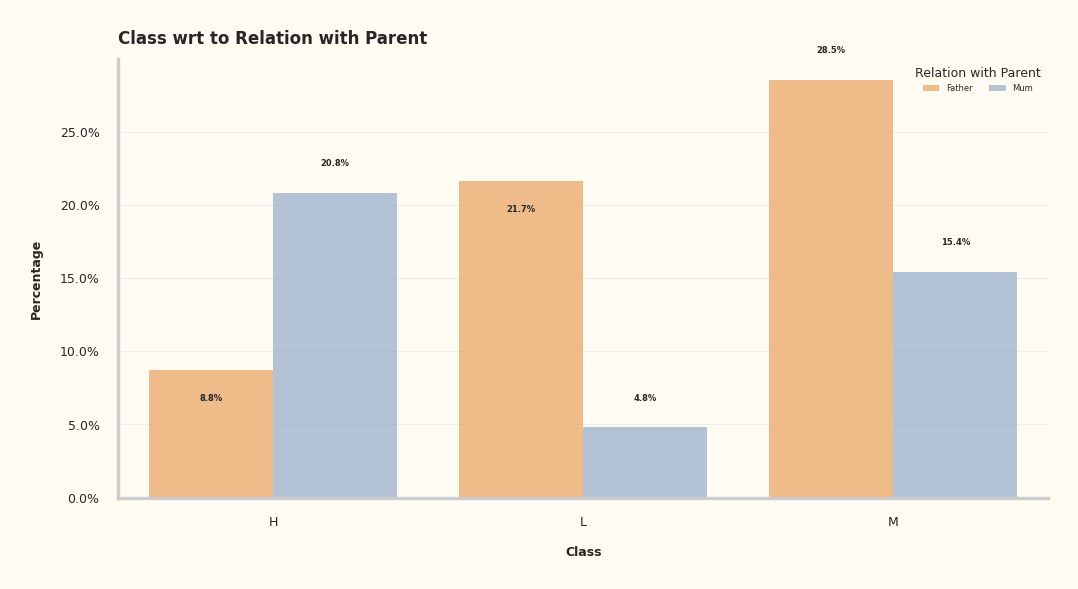

In [141]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "Relation"], dropna=False).size())
temp = temp.query("Relation=='Father' | Relation=='Mum'")
temp = temp.reset_index()
temp.columns = ['Class', 'Relation', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['Relation'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to Relation with Parent', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='Relation with Parent')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

# Class wrt to ParentschoolSatisfaction 

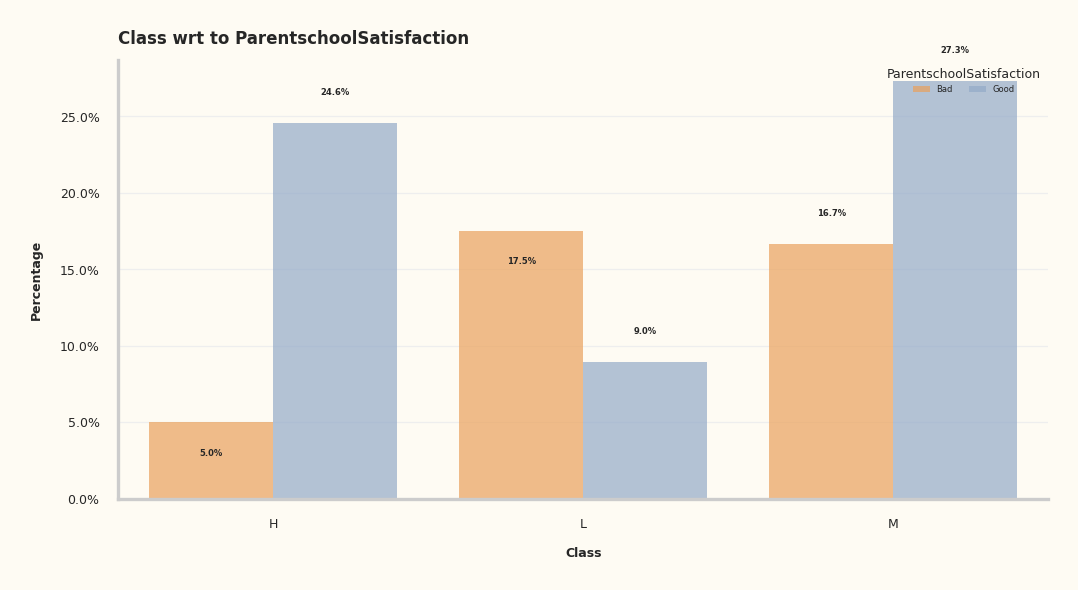

In [140]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "ParentschoolSatisfaction"], dropna=False).size())
temp = temp.query("ParentschoolSatisfaction=='Good' | ParentschoolSatisfaction=='Bad'")
temp = temp.reset_index()
temp.columns = ['Class', 'ParentschoolSatisfaction', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['ParentschoolSatisfaction'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to ParentschoolSatisfaction', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='ParentschoolSatisfaction')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

# Class wrt to ParentAnsweringSurvey 

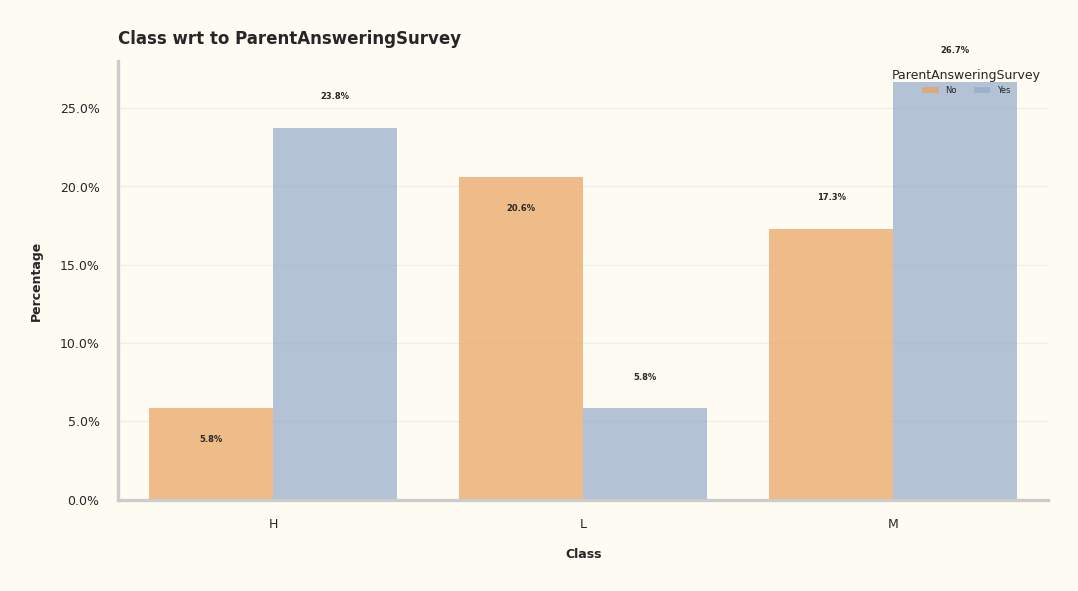

In [139]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "ParentAnsweringSurvey"], dropna=False).size())
temp = temp.query("ParentAnsweringSurvey=='Yes' | ParentAnsweringSurvey=='No'")
temp = temp.reset_index()
temp.columns = ['Class', 'ParentAnsweringSurvey', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['ParentAnsweringSurvey'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to ParentAnsweringSurvey', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='ParentAnsweringSurvey')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

In [66]:
df.columns


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [69]:
df['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

# Class wrt StudentAbsenceDays

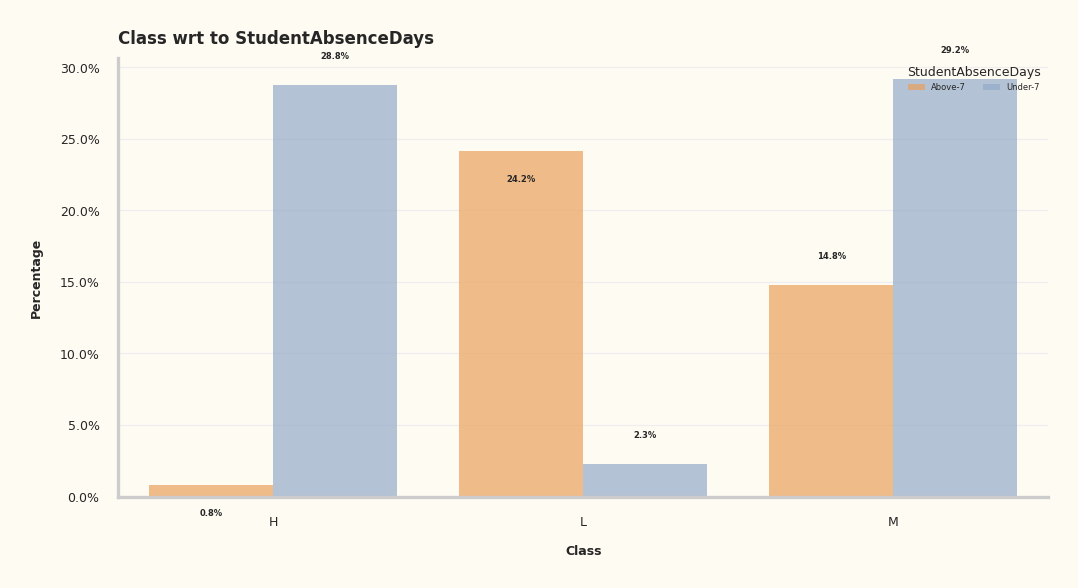

In [142]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "StudentAbsenceDays"], dropna=False).size())
temp = temp.query("StudentAbsenceDays=='Under-7' | StudentAbsenceDays=='Above-7'")
temp = temp.reset_index()
temp.columns = ['Class', 'StudentAbsenceDays', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['StudentAbsenceDays'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to StudentAbsenceDays', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='StudentAbsenceDays')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

#Class wrt Section ID

In [136]:
df['SectionID'].value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

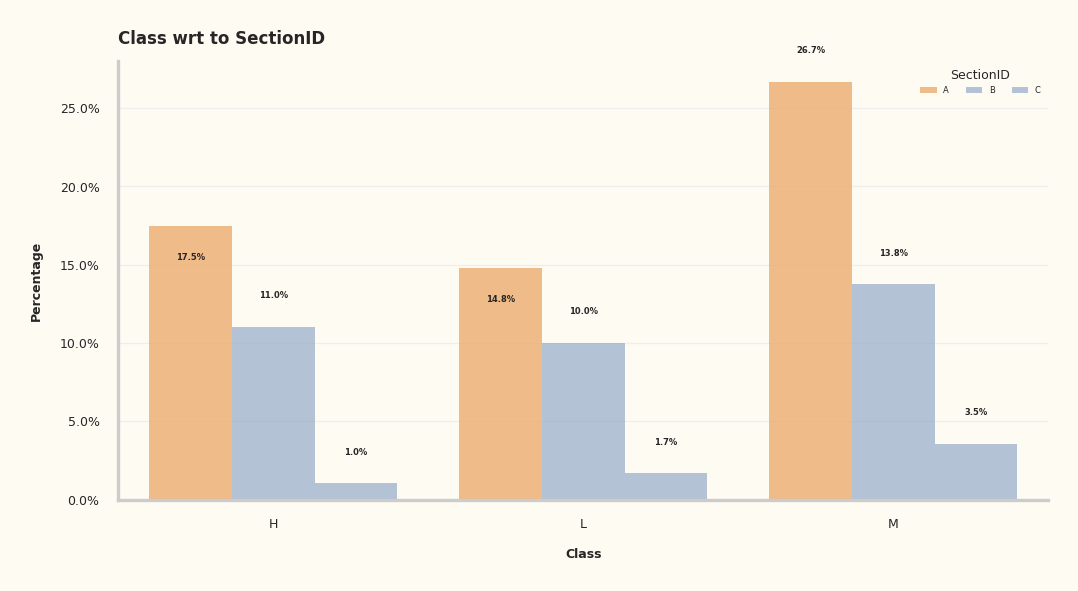

In [143]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)


temp = pd.DataFrame(df.groupby(["Class", "SectionID"], dropna=False).size())
temp = temp.query("SectionID=='A' | SectionID=='B'| SectionID=='C'")
temp = temp.reset_index()
temp.columns = ['Class', 'SectionID', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['Class'], hue=temp['SectionID'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Class wrt to SectionID', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -2
    else:
        y1 = 2
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='SectionID')

#format axis
ax0.set_xlabel("Class",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)


y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

##World Cloud for Place Of Birth

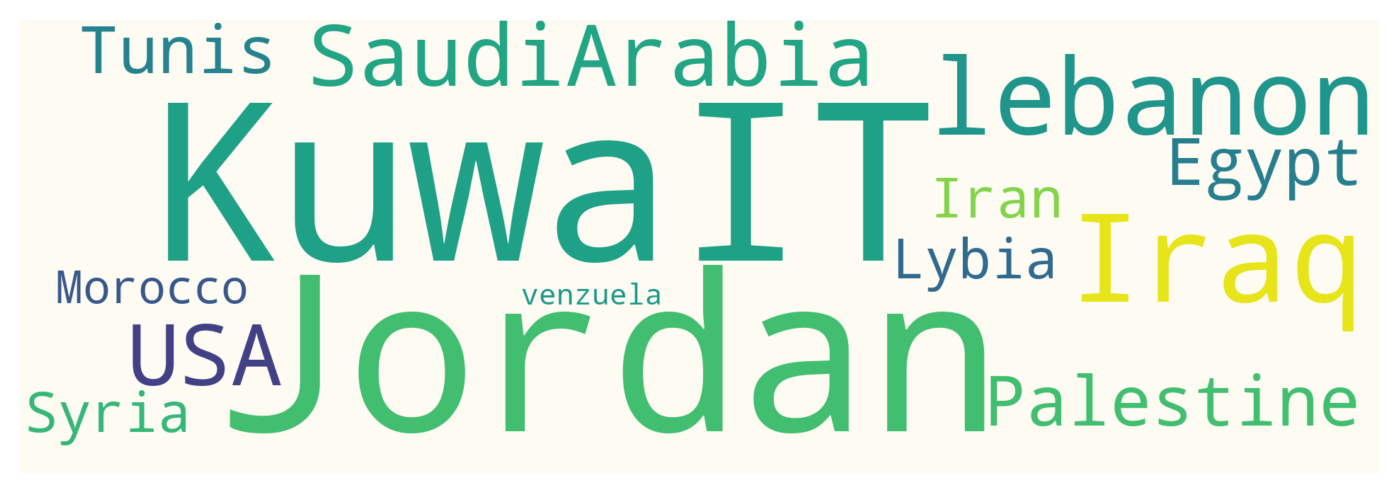

In [21]:
temp = pd.DataFrame(df['PlaceofBirth'])
temp = temp.drop(0)
temp.columns = ['country']
countries = temp['country'].apply(lambda x: 0 if pd.isnull(x) else x)
text1 = " ".join(country for country in countries.astype(str))

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(stopwords = stopwords, collocations = False, background_color = '#FEFBF3',
                        width = 1920, height = 640).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

# Display the generated Word Cloud
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(9, 3))
plt.tight_layout(pad=0)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

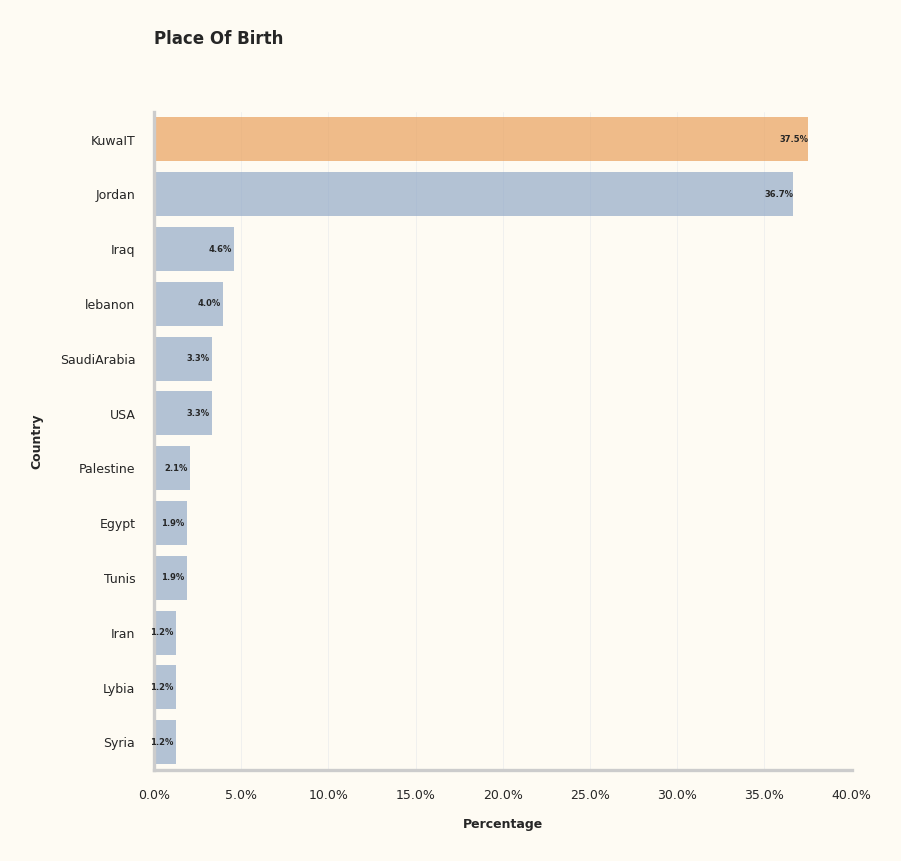

In [17]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 9), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

##########COUNTRY##########
temp = pd.DataFrame(df.groupby('PlaceofBirth', dropna=False).size()).reset_index()
temp.columns = ['country', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp.query("amount>1")


temp = temp.groupby('country').sum()
temp = temp.query("pct>1")
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp[0:20]

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(20)]
color_map[0] = "#F2A154" #F2A154 79B4B7
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 40))
ax0.set(ylim=(0, 20))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['country'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0_sns.set_ylabel("Country",fontsize=3, weight='semibold')
ax0_sns.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1-1.5, 'Place Of Birth', fontsize=4, ha='left', va='top', weight='bold')


# data label
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<14:
        x1 = -.8
    else:
        x1 = .6
    x = p.get_x() + p.get_width() + x1
    i+=1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

## GradeID

## Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

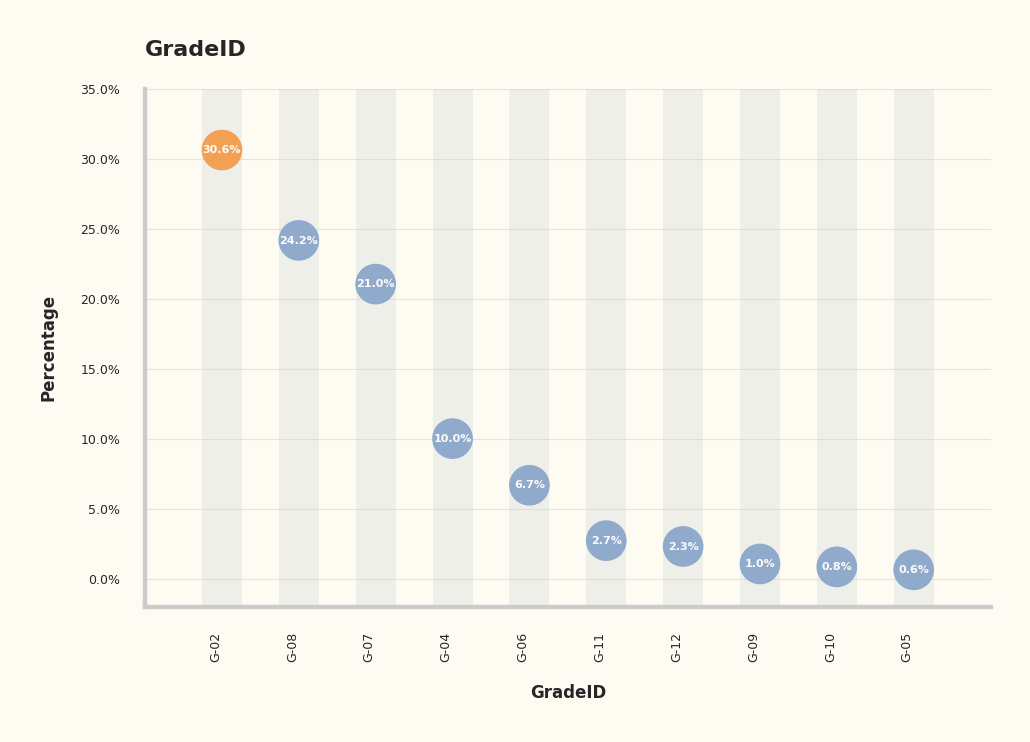

In [25]:
temp = pd.DataFrame(df.groupby('GradeID', dropna=False).size()).reset_index()
temp.columns = ['GradeID', 'amount']
temp = temp.query("amount>1")
temp = temp.query("GradeID!='Other'")
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp.drop('index', axis=1)

plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)
background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(10)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set(xlim=(-1, 10))
ax0.set(ylim=(-2, 35))
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0.scatter(x=temp['GradeID'], y=temp['pct'], s=40, color=color_map, zorder=3)
ax0.grid(which='major', axis='x', zorder=0, color='#E8EAE6', linewidth=7.2, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)

#data label
y = temp['pct']
z = temp['GradeID']
n = temp['pct']
for i, txt in enumerate(n):
    txt = f'{y[i]:.1f}%'
    ax0.annotate(txt, (z[i], y[i]), ha='center', va='center', fontsize=2, weight='semibold', color="#FBFBFB")

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

#format axis
ax0.set_xlabel("GradeID",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.25, width=0.3, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=90, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+3.5, 'GradeID', fontsize=4, ha='left', va='top', weight='bold')


plt.show()


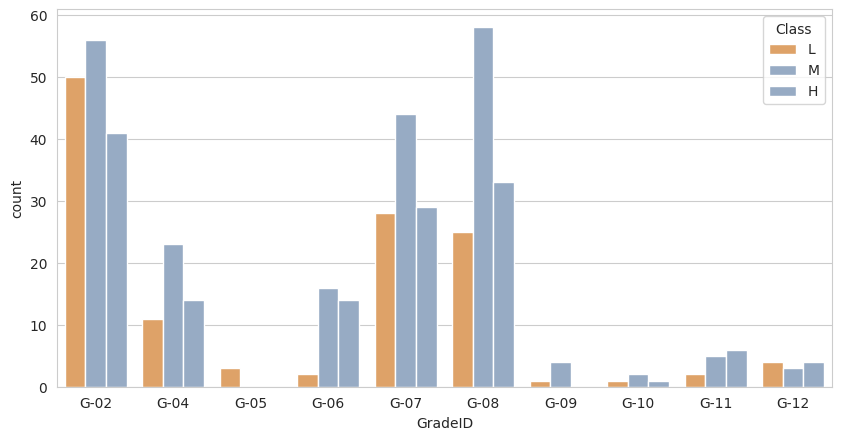

In [130]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x='GradeID', hue='Class', data=df, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'])
plt.show()

# Discussion

In [111]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [112]:
df['Class_Num']=np.where(df['Class']=='L',0,1)
df['Class_Num'].value_counts()

1    353
0    127
Name: Class_Num, dtype: int64

<Figure size 200x500 with 0 Axes>

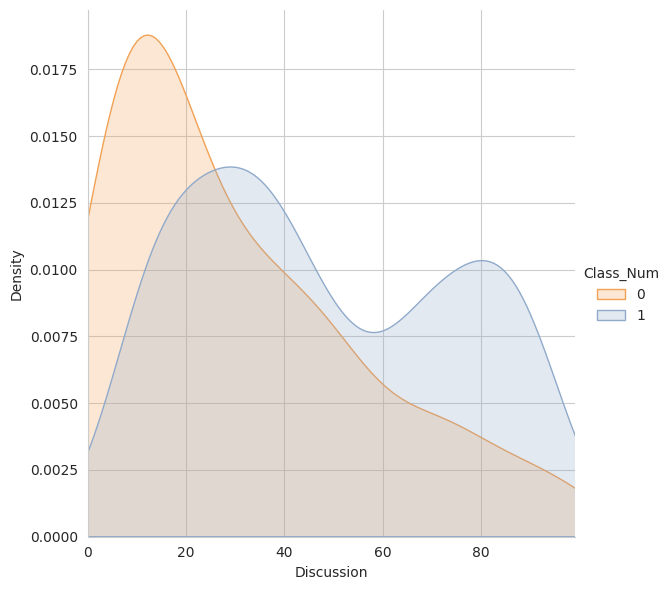

In [113]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'Discussion',shade=True)
Facetgrid.set(xlim=(0,df['Discussion'].max()))
Facetgrid.add_legend()

#AnnouncementsView

<Figure size 200x500 with 0 Axes>

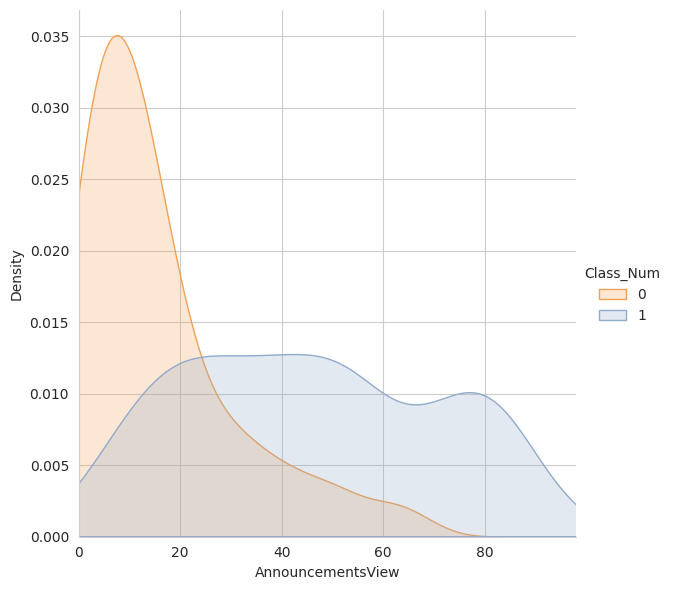

In [114]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'AnnouncementsView',shade=True)
Facetgrid.set(xlim=(0,df['AnnouncementsView'].max()))
Facetgrid.add_legend()

# VisITedResources

## Visited resources- how many times the student visits a course content(numeric:0-100)

<Figure size 200x500 with 0 Axes>

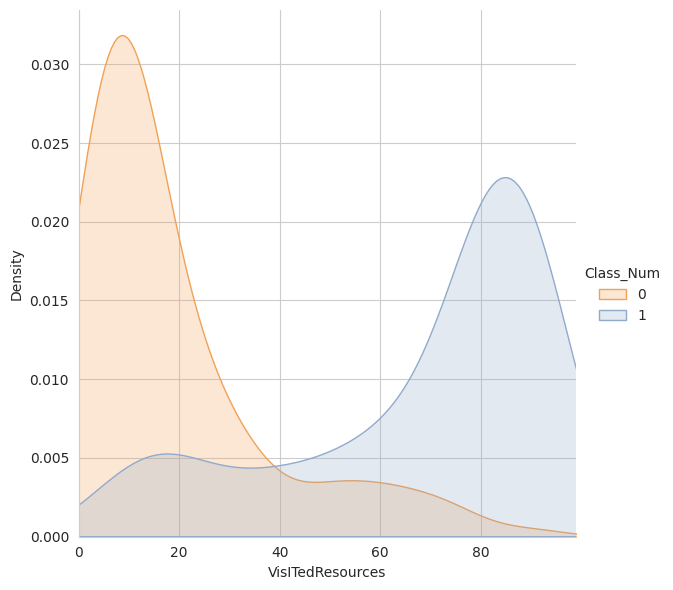

In [115]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'VisITedResources',shade=True)
Facetgrid.set(xlim=(0,df['VisITedResources'].max()))
Facetgrid.add_legend()

In [56]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'LowerGrade', 'Class_Num'],
      dtype='object')

## Raised Hand

<Figure size 200x500 with 0 Axes>

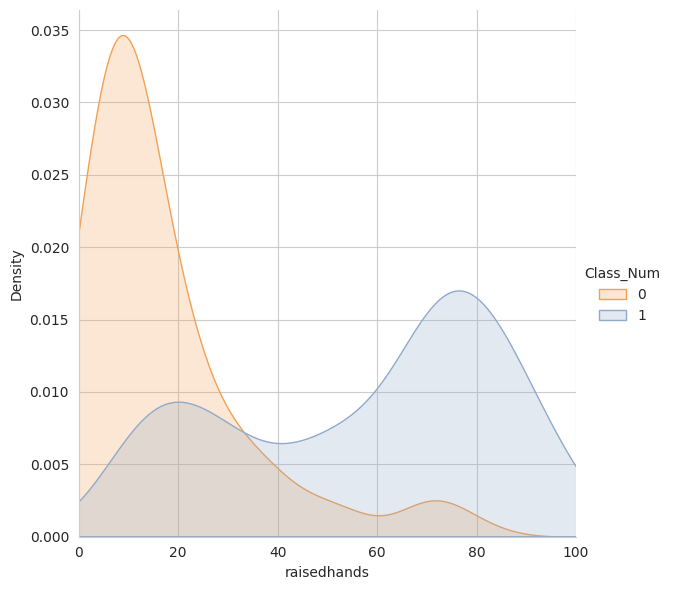

In [116]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(2, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

Facetgrid = sns.FacetGrid(df,hue='Class_Num',height=6)
Facetgrid.map(sns.kdeplot,'raisedhands',shade=True)
Facetgrid.set(xlim=(0,df['raisedhands'].max()))
Facetgrid.add_legend()

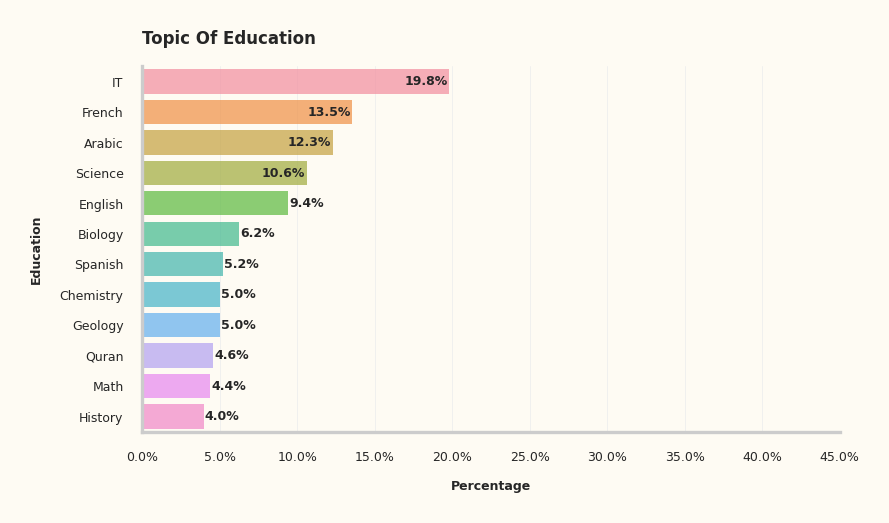

In [117]:
temp = pd.DataFrame(df.groupby('Topic', dropna=False).size()).reset_index()
temp.columns = ['education', 'amount']
temp = temp.query("amount>1")
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False)

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 5), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(7)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 45))
ax0.set(ylim=(0, 7))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['education'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0_sns.set_ylabel("Education",fontsize=3, weight='semibold')
ax0_sns.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0_sns.get_xlim()
y0, y1 = ax0_sns.get_ylim()
ax0_sns.text(x0, y1-1.2, 'Topic Of Education', fontsize=4, ha='left', va='top', weight='bold')


# data labe
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<4:
        x1 = -1.5
    else:
        x1 = 1.2
    x = p.get_x() + p.get_width() + x1
    i+=1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=3, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

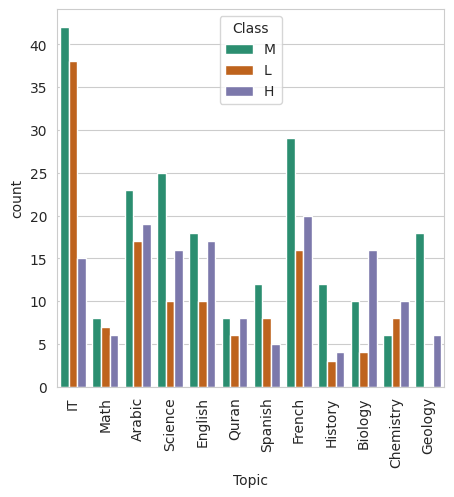

In [120]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

g=sns.countplot(x="Topic", data=df,hue="Class", palette="Dark2");
plt.xticks(rotation=90)

## Clubbing M & H together

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

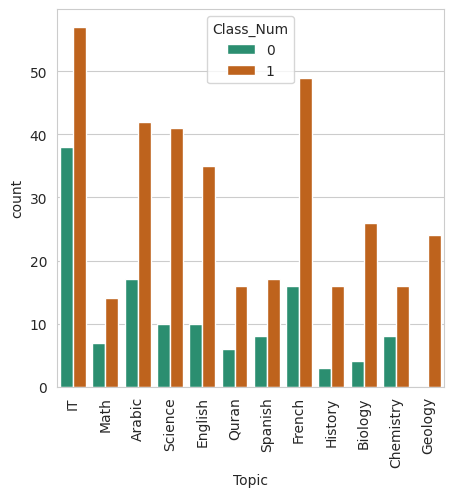

In [121]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

g=sns.countplot(x="Topic", data=df,hue="Class_Num", palette="Dark2");
plt.xticks(rotation=90)

In [122]:
df.drop('Class_Num',axis=1,inplace=True)

In [123]:
df.groupby('Topic').median().style.background_gradient(cmap='YlGn_r')

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.000000,65.000000,41.000000,38.000000
Biology,78.500000,88.500000,54.000000,47.000000
Chemistry,79.000000,84.500000,47.000000,30.500000
English,55.000000,50.000000,33.000000,36.000000
French,35.000000,80.000000,23.000000,21.000000
Geology,80.000000,82.000000,68.500000,60.500000
History,69.000000,84.000000,72.000000,65.000000
IT,20.000000,25.000000,10.000000,40.000000
Math,28.000000,15.000000,19.000000,40.000000
